### Importing necessary libraries

In [1]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import statistics
from scipy.stats import pearsonr
from scipy import stats

### Importing the data

In [2]:
# use a personal style sheet
plt.style.use("./styles/mystyle.mplstyle")

# listing all the current data
data_files = glob.glob(r'../Experiment/data/*.csv') # taking only the two complete files

### Concatenating all data into one big dataset

In [3]:

df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_csv(data_files[i])
    df = pd.concat([df, temp_df])

# select only the main task
df = df.loc[df['task']=='experiment']

# extracting sample size
n = len(set(df.pt_num))

df_correct =  df[df['acc'] == True]


###  the effect of SOA, difficulty of occlusion, and size of occlusion.

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


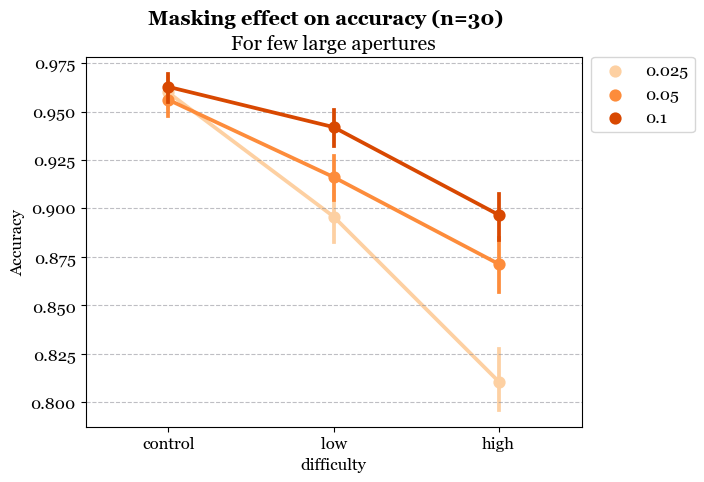

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


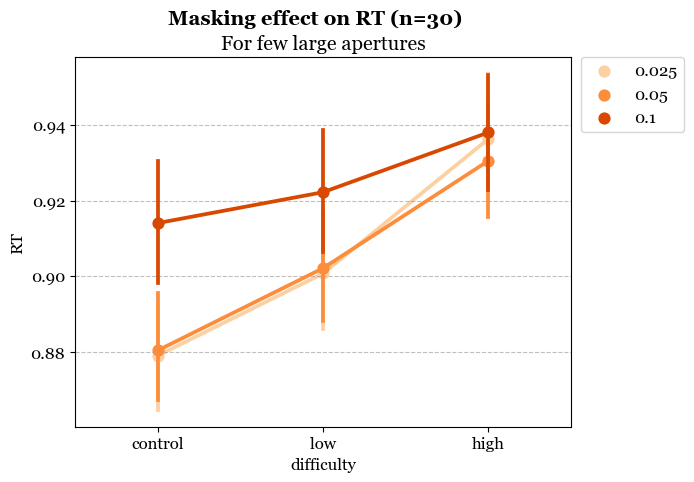

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


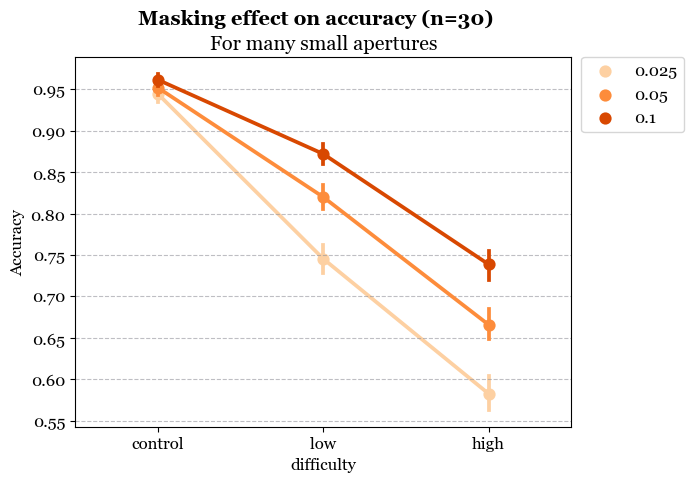

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


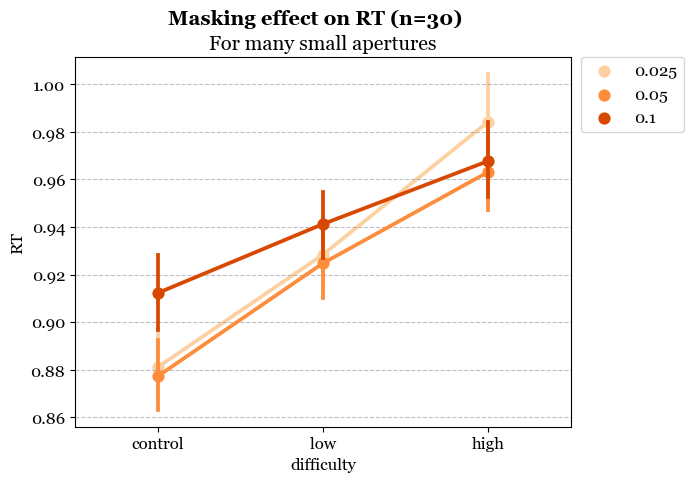

In [4]:
# checking the effect of masking
# for each occluder size separately
for so in set(df['size_occl']):
    # for each measure of performance separately
    for dv in ['acc', 'rt']:
        if dv == 'rt':
            data = df.loc[df['acc']] # only take correct trials for RT
        elif dv == 'acc':
            data = df
        plt.figure()
        plot = sns.pointplot(
            data = data.loc[data['size_occl']==so],
            y = dv,
            x = 'difficulty',
            order = ['control', 'low', 'high'],
            hue = 'soa',
            palette = 'Oranges',
            join = True
        )
        if dv == 'acc':
            # plt.ylim(0.6, 1)
            plt.ylabel("Accuracy")
            plt.suptitle("Masking effect on accuracy (n={})".format(n))
        elif dv == 'rt':
            # plt.ylim(900, 1200)
            plt.ylabel("RT")
            plt.suptitle("Masking effect on RT (n={})".format(n))
        plt.title('For {} apertures'.format(so))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.show()

### Checking the effect of category on experiment**

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


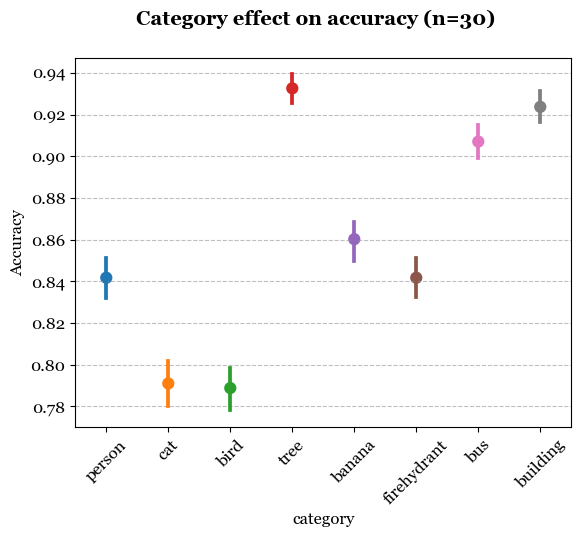

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


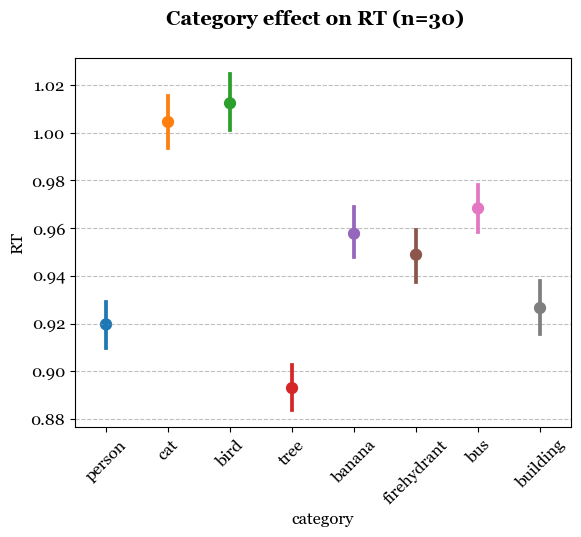

"\nQuestions: \n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on categories and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n3. I have arranged the order by hand to be clear looking, is there any easy way to do that?\n\n"

In [5]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'category',
        order = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
        # hue = 'soa',
        # hue = 'size_occl',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Category effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Category effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions: 
1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on categories and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

3. I have arranged the order by hand to be clear looking, is there any easy way to do that?

"""

### Checking the effect of keys on experiment

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


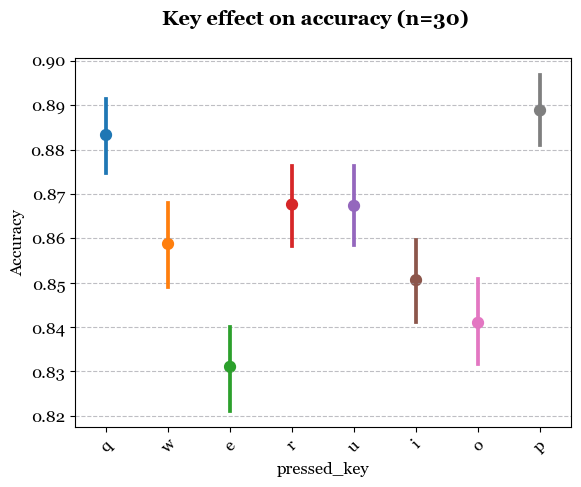

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


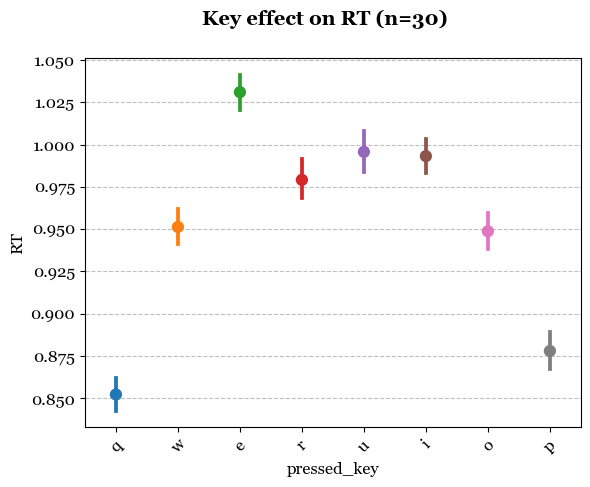

"\nQuestions: \n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on keys and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n"

In [6]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'pressed_key',
        order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions: 
1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on keys and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

"""

### Checking the effect of block whether participants accuracy and reaction time depends on the block number

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\AppData\Local\Temp\ipykernel_9876\2697962484.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:111

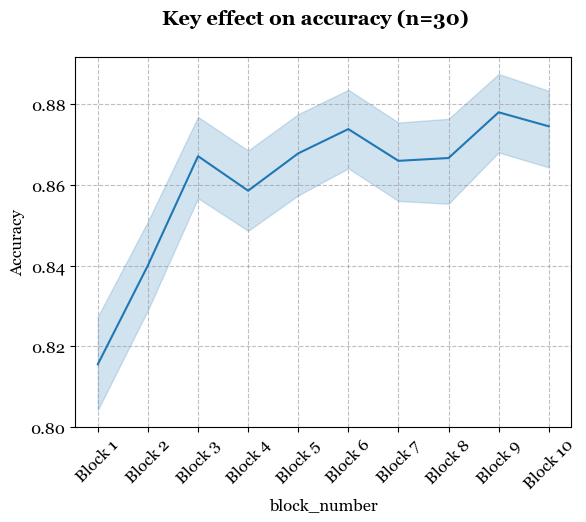

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\AppData\Local\Temp\ipykernel_9876\2697962484.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:111

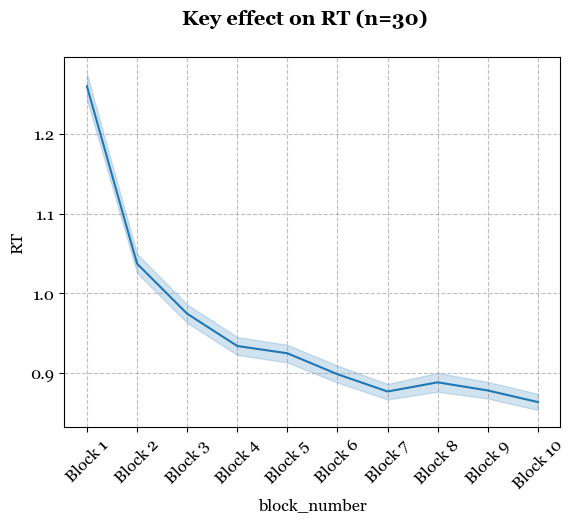

"\nQuestions/Remarks:\nThe discrepancy in between the first block and the rest is further explored on the next cell. \nWorse participants performs considerably worser in the 1st block\n\n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on blocks and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n"

In [7]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.lineplot(
        data = df,
        y = dv,
        x = 'block_number',
        #order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        # hue = 'pt_num',
        palette = 'tab10',
        # join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions/Remarks:
The discrepancy in between the first block and the rest is further explored on the next cell. 
Worse participants performs considerably worser in the 1st block

1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on blocks and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

"""

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30')])

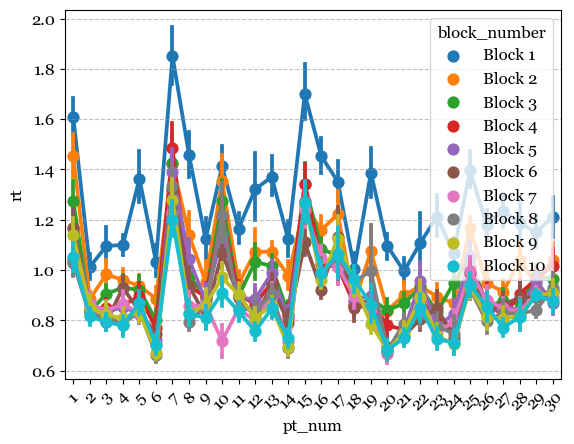

In [8]:
#Checking reaction time per block depending
sns.pointplot(x = df['pt_num'] , y = df['rt'], data = df, hue = 'block_number', palette = 'tab10')
plt.xticks(rotation = 45)

### difference between the control conditions in few large and many small

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

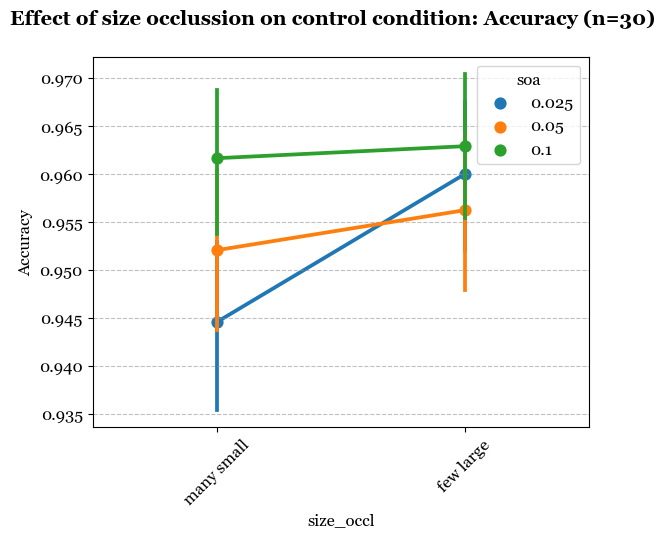

C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

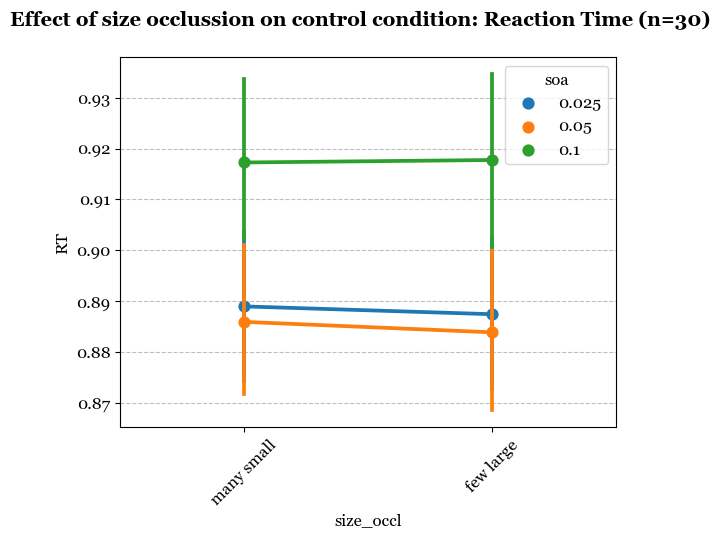

"\nRemarks:\nMore or less it seems to be stable, with few large condition being easier than many small\nReaction time is stable. Comment hue, if we don't want to see depending on SOA.\n\n\n\n"

In [9]:
# for each measure of performance separately
df1 = df[ df["difficulty"] == "control"]
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df1
    elif dv == 'acc':
        data = df1
    plt.figure()
    plot = sns.pointplot(
        data = df1,
        y = dv,
        x = 'size_occl',
        #order = ['q','w','e','r','u','i','o','p'],
        hue = 'soa',
        palette = 'tab10',
        join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of size occlussion on control condition: Accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Effect of size occlussion on control condition: Reaction Time (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Remarks:
More or less it seems to be stable, with few large condition being easier than many small
Reaction time is stable. Comment hue, if we don't want to see depending on SOA.



"""

### Checking Confusion Matrix on responses

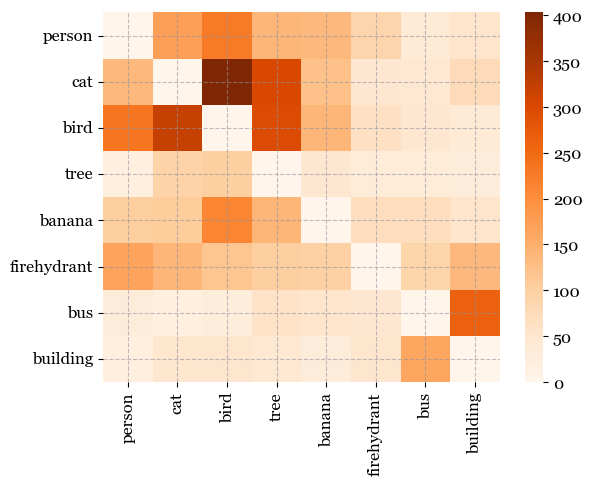

In [10]:
pred = df["choiced_category"]
true = df["category"]
cm = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
diag_idx = np.diag_indices(cm.shape[0]) # find the coordinates of the diagonal
zeroed_cm = cm # duplicate the diagonal
zeroed_cm[diag_idx] = 0 # zero out the values on it

main_cm = sns.heatmap(cm,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges")

## Confusion Matrices in Detail

### Defining CMs for SOA

In [11]:
df_soa25 = df[ df["soa"] == 0.025]
pred = df_soa25["choiced_category"]
true = df_soa25["category"]
cm_25 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_25.shape[0])
zeroed_cm_25 = cm_25
zeroed_cm_25[diag_idx] = 0

df_soa50 = df[ df["soa"] == 0.05]
pred = df_soa50["choiced_category"]
true = df_soa50["category"]
cm_50 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_50.shape[0])
zeroed_cm_50 = cm_50
zeroed_cm_50[diag_idx] = 0
#zero out the diagonal -end

df_soa100 = df[ df["soa"] == 0.1]
print(len(df_soa100))
pred = df_soa100["choiced_category"]
true = df_soa100["category"]
cm_100 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_100.shape[0])
zeroed_cm_100 = cm_100
zeroed_cm_100[diag_idx] = 0
#zero out the diagonal -end

14400


### Confusion Matrices for SOAs

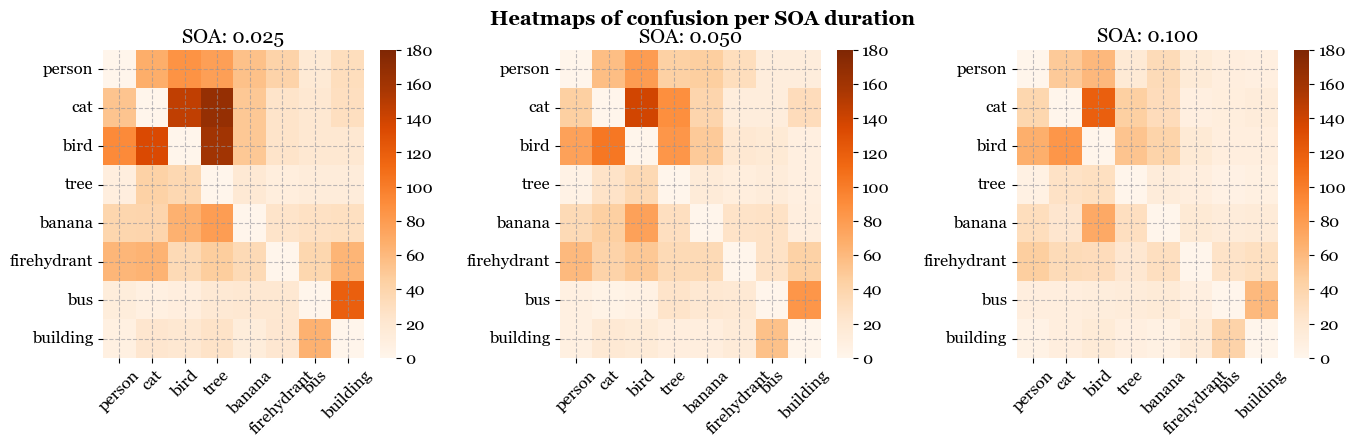

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per SOA duration")
axes[0].set_title("SOA: 0.025")

soa_25 = sns.heatmap(cm_25, vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("SOA: 0.050")
soa_50 = sns.heatmap(cm_50,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)

axes[2].set_title("SOA: 0.100")
soa_100 = sns.heatmap(cm_100,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap = "Oranges",
                 ax = axes[2])
axes[2].tick_params(axis='x', labelrotation = 45)

### Defining CMs for Difficulty

In [13]:
df_dif_control = df[ df["difficulty"] == "control"]
print(len(df_dif_control))
pred = df_dif_control["choiced_category"]
true = df_dif_control["category"]
cm_dif_control = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_dif_control.shape[0])
zeroed_cm_dif_control = cm_dif_control
zeroed_cm_dif_control[diag_idx] = 0
#zero out the diagonal -end

df_dif_low = df[ df["difficulty"] == "low"]
pred = df_dif_low["choiced_category"]
true = df_dif_low["category"]
cm_dif_low = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_dif_low.shape[0])
zeroed_cm_dif_low = cm_dif_low
zeroed_cm_dif_low[diag_idx] = 0
#zero out the diagonal -end

df_dif_high = df[ df["difficulty"] == "high"]
pred = df_dif_high["choiced_category"]
true = df_dif_high["category"]
cm_dif_high = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_dif_high.shape[0])
zeroed_cm_dif_high = cm_dif_high
zeroed_cm_dif_high[diag_idx] = 0
#zero out the diagonal -end

14400


### Confusion Matrices for Difficulty Levels

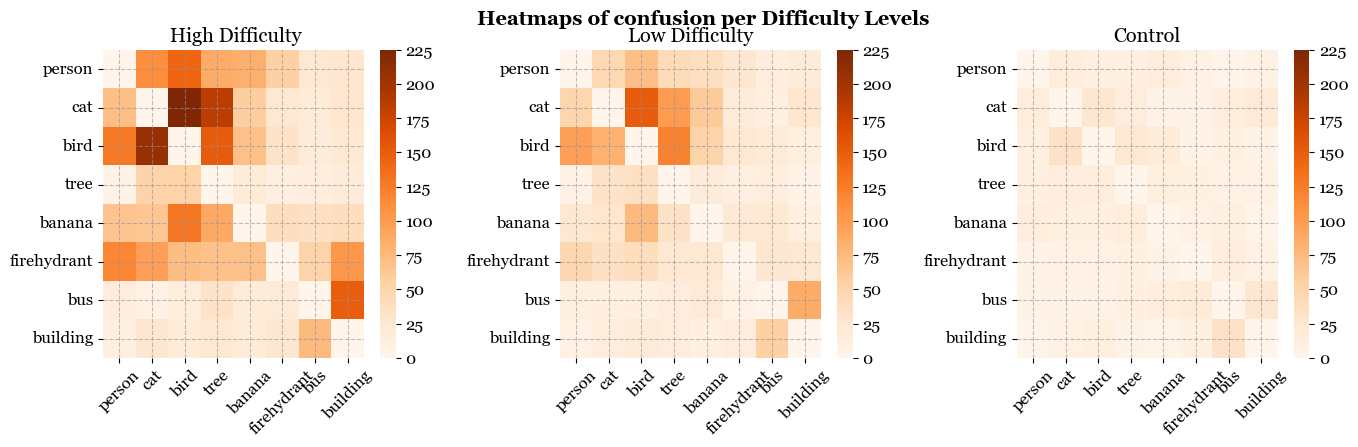

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per Difficulty Levels")
axes[0].set_title(" High Difficulty")

dif_high = sns.heatmap(cm_dif_high, vmin=0, vmax=225,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Low Difficulty")
diff_low = sns.heatmap(cm_dif_low,vmin=0, vmax=225,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)

axes[2].set_title("Control")
diff_control = sns.heatmap(cm_dif_control,vmin=0, vmax=225,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap = "Oranges",
                 ax = axes[2])
axes[2].tick_params(axis='x', labelrotation = 45)

### Defining CMs for Occluder Size

In [15]:
df_few_large = df[ df["size_occl"] == "few large"]
pred = df_few_large["choiced_category"]
true = df_few_large["category"]
cm_few_large = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_few_large.shape[0])
zeroed_cm_few_large = cm_few_large
zeroed_cm_few_large[diag_idx] = 0
#zero out the diagonal -end

df_many_small = df[ df["size_occl"] == "many small"]
pred = df_many_small["choiced_category"]
true = df_many_small["category"]
cm_many_small = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_many_small.shape[0])
zeroed_cm_many_small = cm_many_small
zeroed_cm_many_small[diag_idx] = 0
#zero out the diagonal -end

### Confusion Matrices for Occluder Size

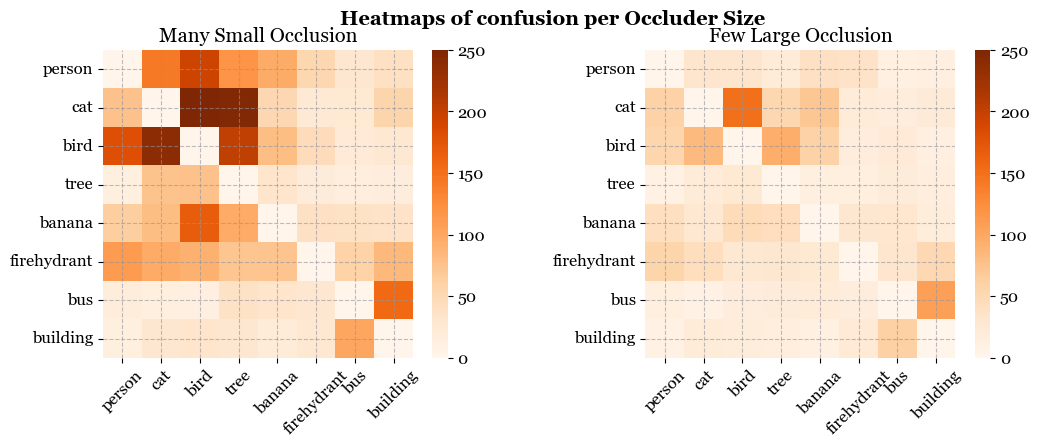

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (12,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per Occluder Size")
axes[0].set_title("Many Small Occlusion")

occ_many_small = sns.heatmap(cm_many_small, vmin=0, vmax=250,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Few Large Occlusion")
occ_few_large = sns.heatmap(cm_few_large,vmin=0, vmax=250,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)


### Shape Distance Matrix and Correlations

In [17]:
SDM = pd.read_csv("shape_distance_matrix.csv", index_col = 0)
SDM_cm = SDM.to_numpy()

### Main CM & SDM

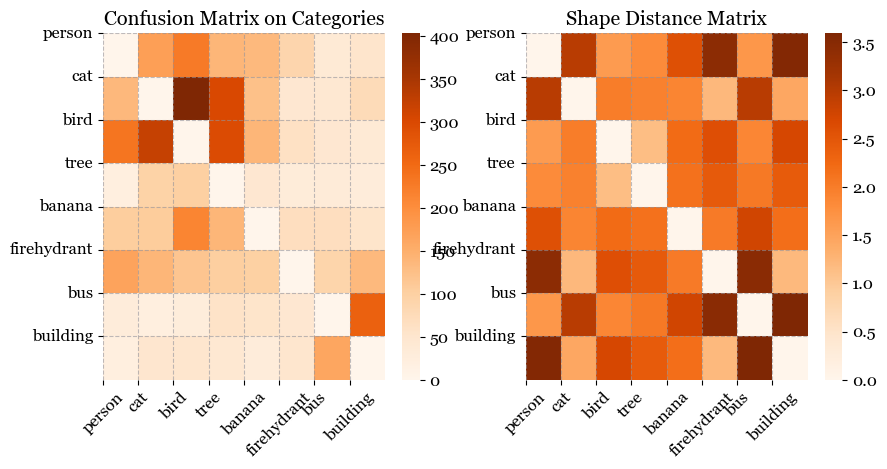

PearsonRResult(statistic=-0.10681177152686974, pvalue=0.4333197355139487)

In [18]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

main_cm = sns.heatmap(cm,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges", ax = axes[0])

SDM_heatmap = sns.heatmap(SDM_cm,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges", ax = axes[1])

# Plot the first confusion matrix
#axes[0].imshow(cm, cmap='Greens')
axes[0].set_title('Confusion Matrix on Categories')
# Plot the second confusion matrix
axes[1].set_title('Shape Distance Matrix')

# Adjust the layout
#plt.tight_layout()
plt.yticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
plt.xticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'], rotation =45)
plt.sca(axes[0])
plt.yticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
plt.xticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],rotation =45)
# Display the plot
plt.show()

#calculate the correlation coefficient removing the diagonal from the calculation
pearsonr(
    np.ravel(cm[~(np.identity(cm.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
)

### SOA's and SDM

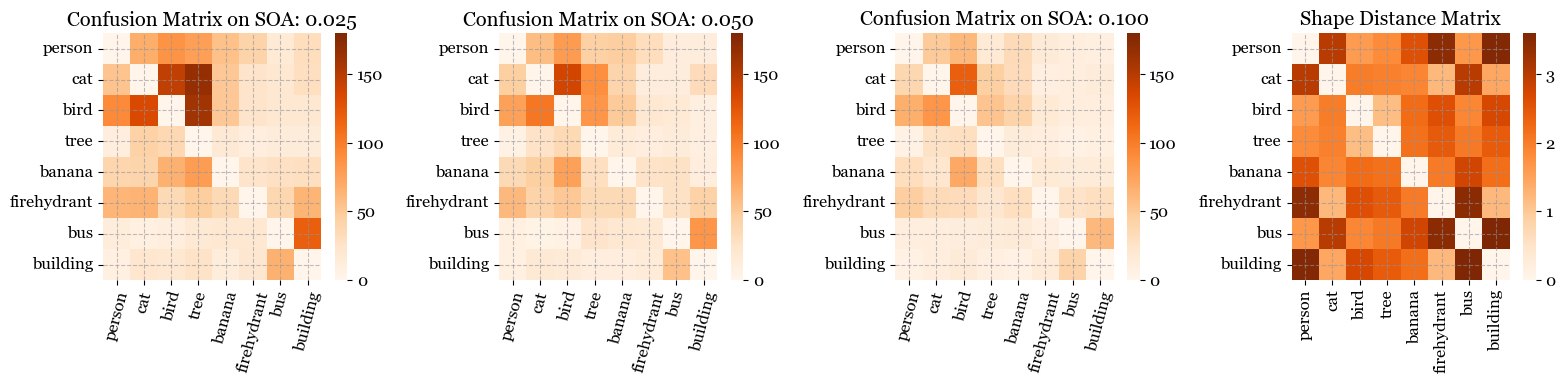

Correlation Coefficient for SOA:25 and SDM is:
PearsonRResult(statistic=-0.13497461934627875, pvalue=0.32128319793171123)
Correlation Coefficient for SOA:50 and SDM is:
PearsonRResult(statistic=-0.08989780932971891, pvalue=0.5099621636389347)
Correlation Coefficient for SOA:100 and SDM is:n
PearsonRResult(statistic=-0.06538844953061863, pvalue=0.6320816646330547)


In [19]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
soa_25 = sns.heatmap(cm_25, vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 75)

axes[1].set_title("SOA: 0.050")
soa_50 = sns.heatmap(cm_50,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 75)

axes[2].set_title("SOA: 0.100")
soa_100 = sns.heatmap(cm_100,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap = "Oranges",
                 ax = axes[2])
axes[2].tick_params(axis='x', labelrotation = 75)

SDM_heatmap = sns.heatmap(SDM_cm,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges", ax = axes[3])

# Plot the first confusion matrix
#axes[0].imshow(cm, cmap='Greens')
axes[0].set_title('Confusion Matrix on SOA: 0.025')
axes[1].set_title('Confusion Matrix on SOA: 0.050')
axes[2].set_title('Confusion Matrix on SOA: 0.100')
# Plot the second confusion matrix
axes[3].set_title('Shape Distance Matrix')

# Adjust the layout
plt.tight_layout()

plt.show()

print("Correlation Coefficient for SOA:25 and SDM is:")
#calculate the correlation coefficient removing the diagonal from the calculation
print(pearsonr(
    np.ravel(cm_25[~(np.identity(cm_25.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
))

print("Correlation Coefficient for SOA:50 and SDM is:")
#calculate the correlation coefficient removing the diagonal from the calculation
print(pearsonr(
    np.ravel(cm_50[~(np.identity(cm_50.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
))

print("Correlation Coefficient for SOA:100 and SDM is:n")
#calculate the correlation coefficient removing the diagonal from the calculation
print(pearsonr(
    np.ravel(cm_100[~(np.identity(cm_100.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
))

### Occluders & SDM

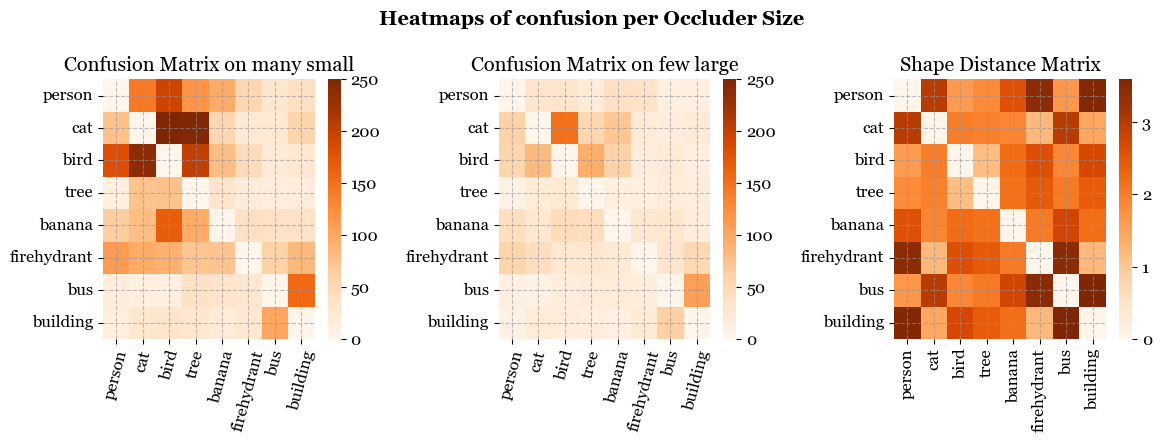

Correlation Coefficient for many_small occluder and SDM is:
PearsonRResult(statistic=-0.13746096016236353, pvalue=0.31236661171357544)
Correlation Coefficient for few_large occluder and SDM is:
PearsonRResult(statistic=-0.016771442412518683, pvalue=0.9023574570966666)


In [20]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize = (12,4.5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per Occluder Size")
axes[0].set_title("Many Small Occlusion")

occ_many_small = sns.heatmap(cm_many_small, vmin=0, vmax=250,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 75)

axes[1].set_title("Few Large Occlusion")
occ_few_large = sns.heatmap(cm_few_large,vmin=0, vmax=250,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 75)

SDM_heatmap = sns.heatmap(SDM_cm,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges", ax = axes[2])

# Plot the first confusion matrix
#axes[0].imshow(cm, cmap='Greens')
axes[0].set_title('Confusion Matrix on many small')
axes[1].set_title('Confusion Matrix on few large')
# Plot the second confusion matrix
axes[2].set_title('Shape Distance Matrix')

# Adjust the layout
plt.tight_layout()

plt.show()

print("Correlation Coefficient for many_small occluder and SDM is:")
#calculate the correlation coefficient removing the diagonal from the calculation
print(pearsonr(
    np.ravel(cm_many_small[~(np.identity(cm_many_small.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
))

print("Correlation Coefficient for few_large occluder and SDM is:")
#calculate the correlation coefficient removing the diagonal from the calculation
print(pearsonr(
    np.ravel(cm_few_large[~(np.identity(cm_few_large.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
))


### Dimensionality Reduction (Work in Progress)

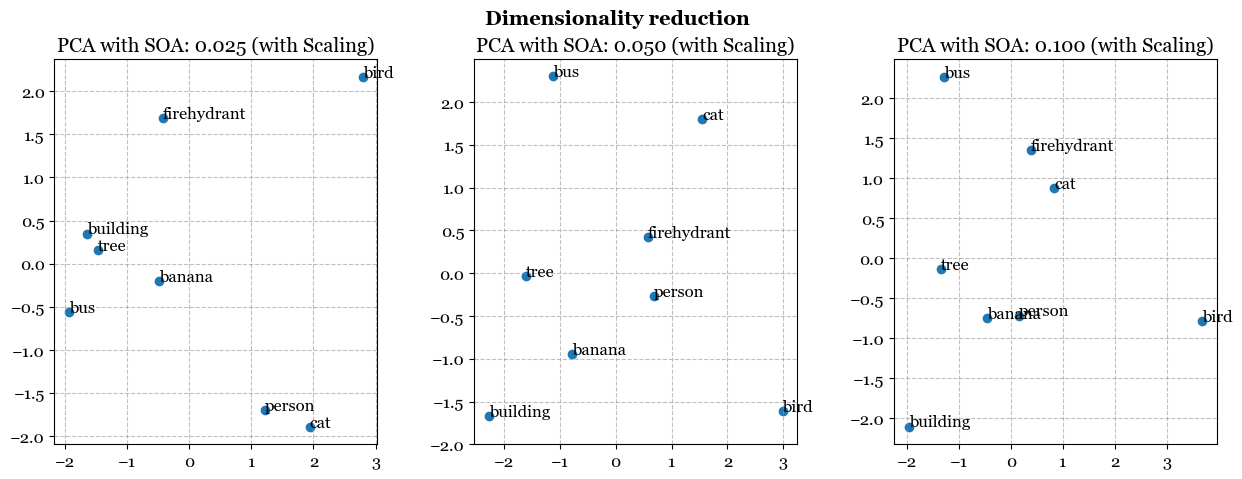

In [21]:
## MDS
# this script takes in confusion matrices and plots their data
# through different techniques
# it then compares human and NN data

#to ignore the package related warnings
import warnings
warnings.filterwarnings("ignore")

# import packages
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import umap.umap_ as umap
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Make a dictionary holding all confusion matrices
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# Scale the data using StandardScaler
# this is using a simple z = (x - u) / s formula
scaler = StandardScaler()

# Apply dimensionality reduction techniques
dim_reduction_methods = {
    #'t-SNE': TSNE(n_components=2, random_state=42, perplexity=5),
    'PCA': PCA(n_components=2),
    #'UMAP': umap.UMAP(n_components=2, random_state=42),
    #'MDS': MDS(n_components=2, random_state=42),
}

# Plot the results
    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# For each model & each method make a visualisation and add it onto the figure
for i, (name, method) in enumerate(dim_reduction_methods.items()):
    # Apply dimensionality reduction without scaling
    reduced_matrix = method.fit_transform(scaler.fit_transform(cm_25))
    ax = axes[0]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with SOA: 0.025 (with Scaling)')
    #Keep everything on same scale
    ax.set_xticks([-2, -1, 0, 1, 2, 3])
    ax.set_yticks([2, 1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5, -2.0])

    reduced_matrix = method.fit_transform(scaler.fit_transform(cm_50))
    ax = axes[1]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with SOA: 0.050 (with Scaling)')
    #Keep everything on same scale
    ax.set_xticks([-2, -1, 0, 1, 2, 3])
    ax.set_yticks([2, 1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5, -2.0])
    
    reduced_matrix = method.fit_transform(scaler.fit_transform(cm_100))
    ax = axes[2]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with SOA: 0.100 (with Scaling)')
    #Keep everything on same scale
    ax.set_xticks([-2, -1, 0, 1, 2, 3])
    ax.set_yticks([2, 1.5, 1.0, 0.5, 0, -0.5, -1.0, -1.5, -2.0])

plt.suptitle(f'Dimensionality reduction', fontweight = 'bold')
plt.show()

### Alternative

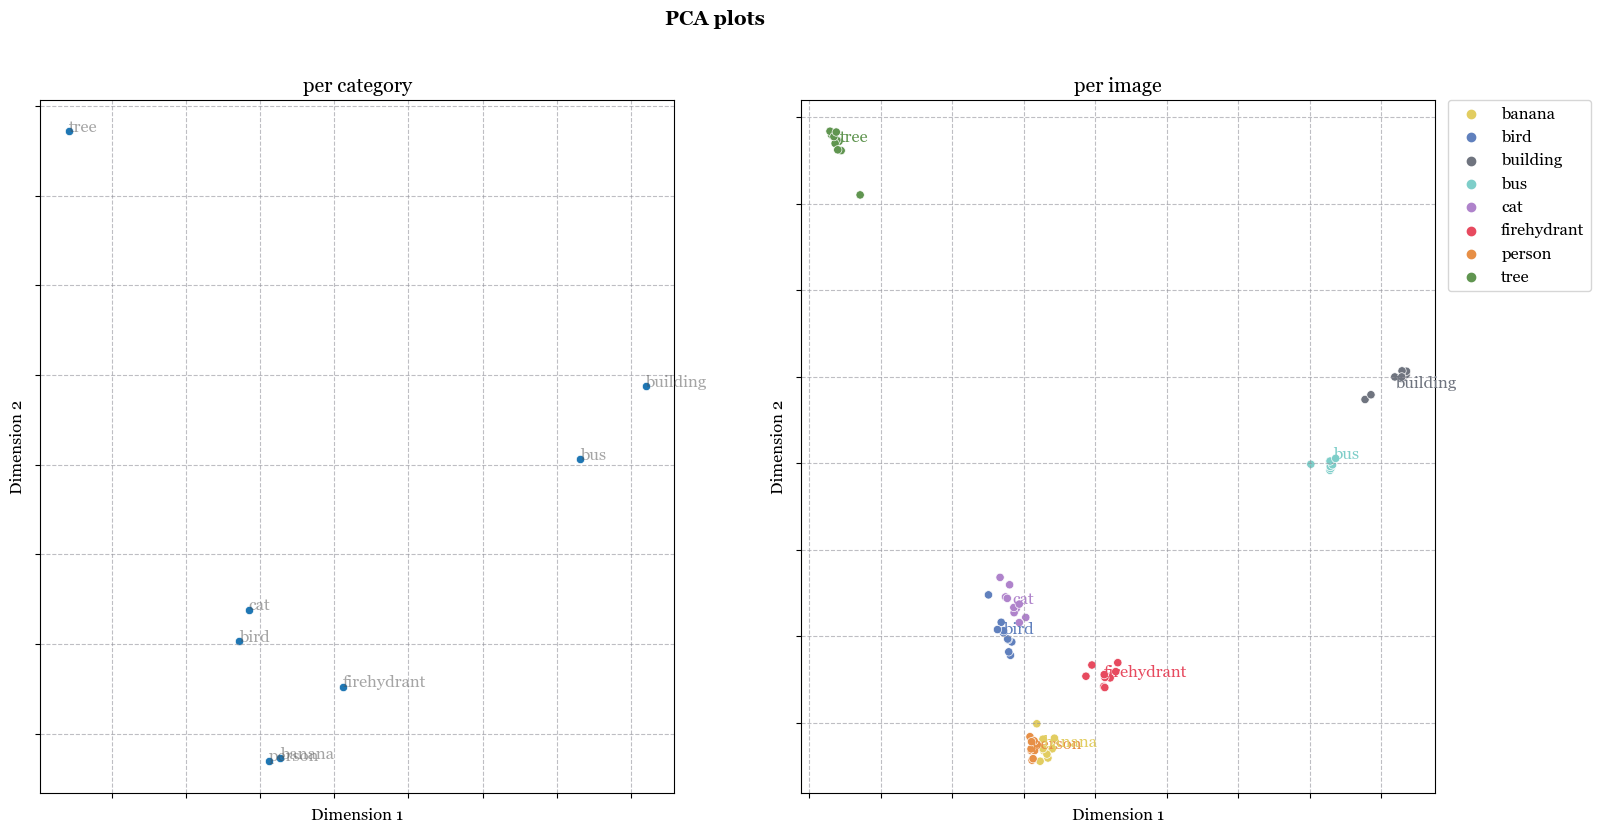

In [22]:
# import packages
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Style
# plt.style.use("./style_sheet/mystyle.mplstyle")

# Load the data
df = pd.read_csv(r'./fulldataset.csv')


df['image'] = [ df['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df)) ]



# extract category labels with set order
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# create a palette for the categories
category_colours = {
    'person': '#E78F46',
    'cat': '#AF83CB',
    'bird': '#6080BD',
    'tree': '#609550',
    'banana': '#E2CD61',
    'firehydrant': '#E74A5F',
    'bus': '#7ECEC9',
    'building': '#6F747F'
}

# extract image labels with set order
im_labels = np.unique(df['image'])

# Build the normal confusion matrix
y_true = df['category']
y_pred = df['choiced_category']
cm = confusion_matrix(y_true, y_pred, labels=labels)
# Standardise it
cm = ( cm - np.mean(cm) ) / np.std(cm)

cm_25 = ( cm_25 - np.mean(cm_25) ) / np.std(cm_25)
cm_50 = ( cm_50 - np.mean(cm_50) ) / np.std(cm_50)
cm_100 = ( cm_100 - np.mean(cm_100) ) / np.std(cm_100)

# Build the image-wise confusion matrix
im_cm = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm[l] = [len(df.loc[(df['image']==im) & (df['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm = (im_cm.sub(np.mean(im_cm.values))).div(np.std(im_cm.values))

# example how to fit and then transform
PCA(n_components=2).fit_transform(cm)
model = PCA(n_components=2).fit(cm)
transformed_data = model.transform(cm)

### Build the dimensionality reduction matrices
# category-wise
std_cm = pd.DataFrame(
    data = {
        'Category': labels,
        'Dimension 1': PCA(n_components=2).fit_transform(cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(cm)[:,1],
    }
)
# image-wise
std_im_cm = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm)[:,1],
    }
)

### Plot the results

fig, axes = plt.subplots(1, 2, figsize = (18, 9))

# category-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1', 
    y = 'Dimension 2', 
    data = std_cm, 
    ax = axes[0],
)
scatterplot.set(xticklabels=[], yticklabels=[])
for j, txt in enumerate(labels):
    axes[0].annotate(txt, (std_cm.loc[j, 'Dimension 1'], std_cm.loc[j, 'Dimension 2']), color=(0.3, 0.3, 0.3, 0.5))
axes[0].set_title('per category')

# image-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = std_im_cm,
    ax = axes[1],
    hue = 'Category',
    palette = category_colours
)
scatterplot.set(xticklabels=[], yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for c in labels:
    axes[1].annotate(
        c,
        (std_cm.loc[std_cm['Category']==c, 'Dimension 1'], std_cm.loc[std_cm['Category']==c, 'Dimension 2']), 
        color = category_colours[c]
    )
axes[1].set_title('per image')

plt.suptitle('PCA plots', fontweight = 'bold')
plt.show()



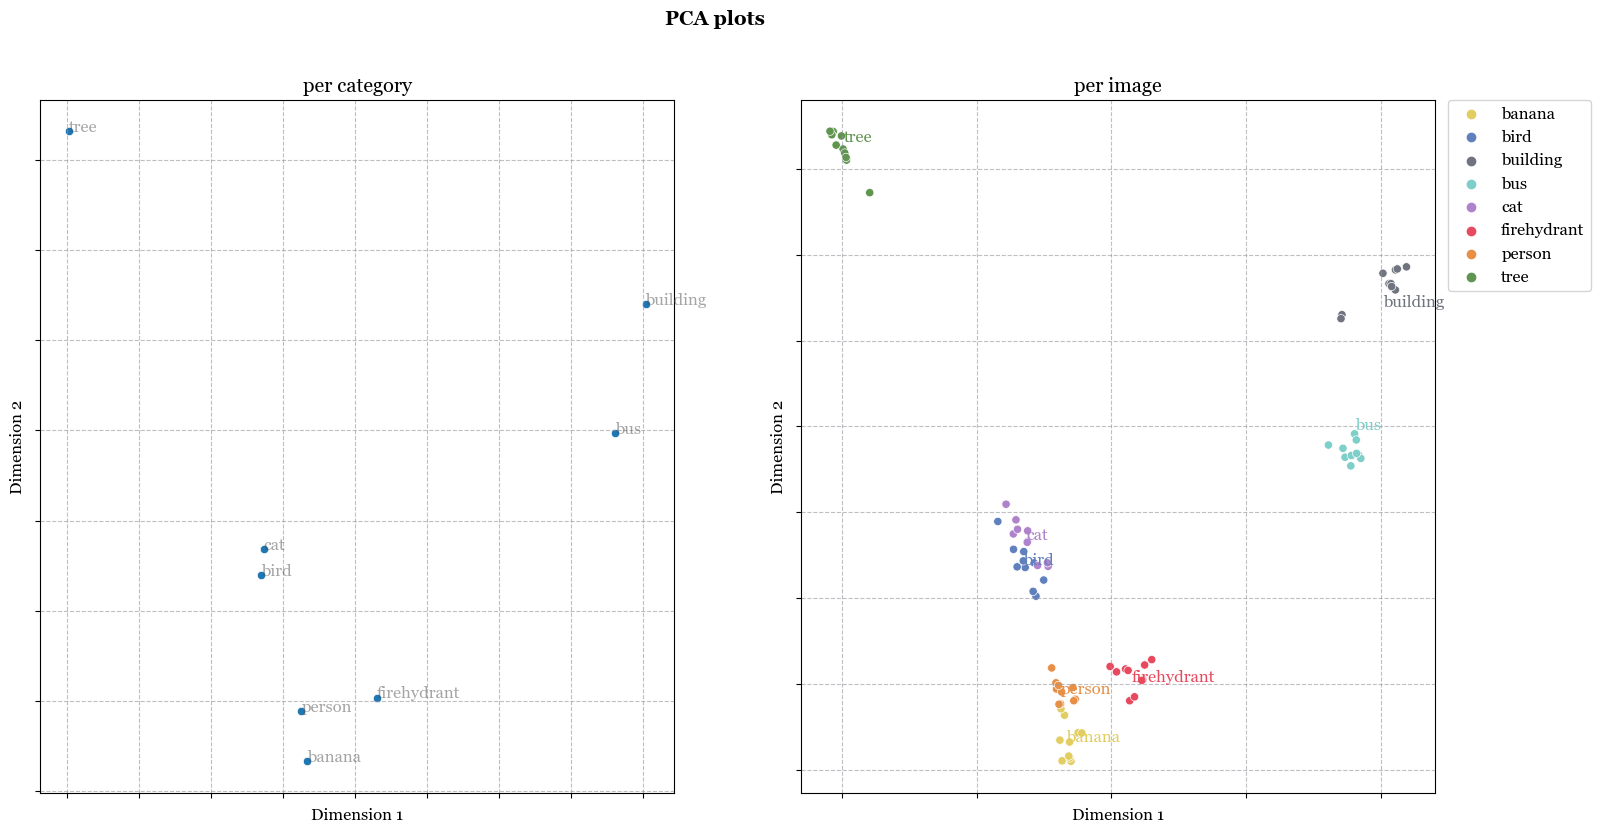

In [23]:
# import packages
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Style
# plt.style.use("./style_sheet/mystyle.mplstyle")

# Load the data
#df = pd.read_csv(r'./fulldataset.csv')


df_soa25['image'] = [df_soa25['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df_soa25)) ]



# extract category labels with set order
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# create a palette for the categories
category_colours = {
    'person': '#E78F46',
    'cat': '#AF83CB',
    'bird': '#6080BD',
    'tree': '#609550',
    'banana': '#E2CD61',
    'firehydrant': '#E74A5F',
    'bus': '#7ECEC9',
    'building': '#6F747F'
}

# extract image labels with set order
im_labels = np.unique(df_soa25['image'])

# Build the normal confusion matrix
y_true = df_soa25['category']
y_pred = df_soa25['choiced_category']
cm = confusion_matrix(y_true, y_pred, labels=labels)
# Standardise it
cm = ( cm - np.mean(cm) ) / np.std(cm)



# Build the image-wise confusion matrix
im_cm = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm[l] = [len(df_soa25.loc[(df_soa25['image']==im) & (df_soa25['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm = (im_cm.sub(np.mean(im_cm.values))).div(np.std(im_cm.values))

# example how to fit and then transform
PCA(n_components=2).fit_transform(cm)
model = PCA(n_components=2).fit(cm)
transformed_data = model.transform(cm)

### Build the dimensionality reduction matrices
# category-wise
std_cm = pd.DataFrame(
    data = {
        'Category': labels,
        'Dimension 1': PCA(n_components=2).fit_transform(cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(cm)[:,1],
    }
)
# image-wise
std_im_cm = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm)[:,1],
    }
)

### Plot the results

fig, axes = plt.subplots(1, 2, figsize = (18, 9))

# category-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1', 
    y = 'Dimension 2', 
    data = std_cm, 
    ax = axes[0],
)
scatterplot.set(xticklabels=[], yticklabels=[])
for j, txt in enumerate(labels):
    axes[0].annotate(txt, (std_cm.loc[j, 'Dimension 1'], std_cm.loc[j, 'Dimension 2']), color=(0.3, 0.3, 0.3, 0.5))
axes[0].set_title('per category')

# image-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = std_im_cm,
    ax = axes[1],
    hue = 'Category',
    palette = category_colours
)
scatterplot.set(xticklabels=[], yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for c in labels:
    axes[1].annotate(
        c,
        (std_cm.loc[std_cm['Category']==c, 'Dimension 1'], std_cm.loc[std_cm['Category']==c, 'Dimension 2']), 
        color = category_colours[c]
    )
axes[1].set_title('per image')

plt.suptitle('PCA plots', fontweight = 'bold')
plt.show()



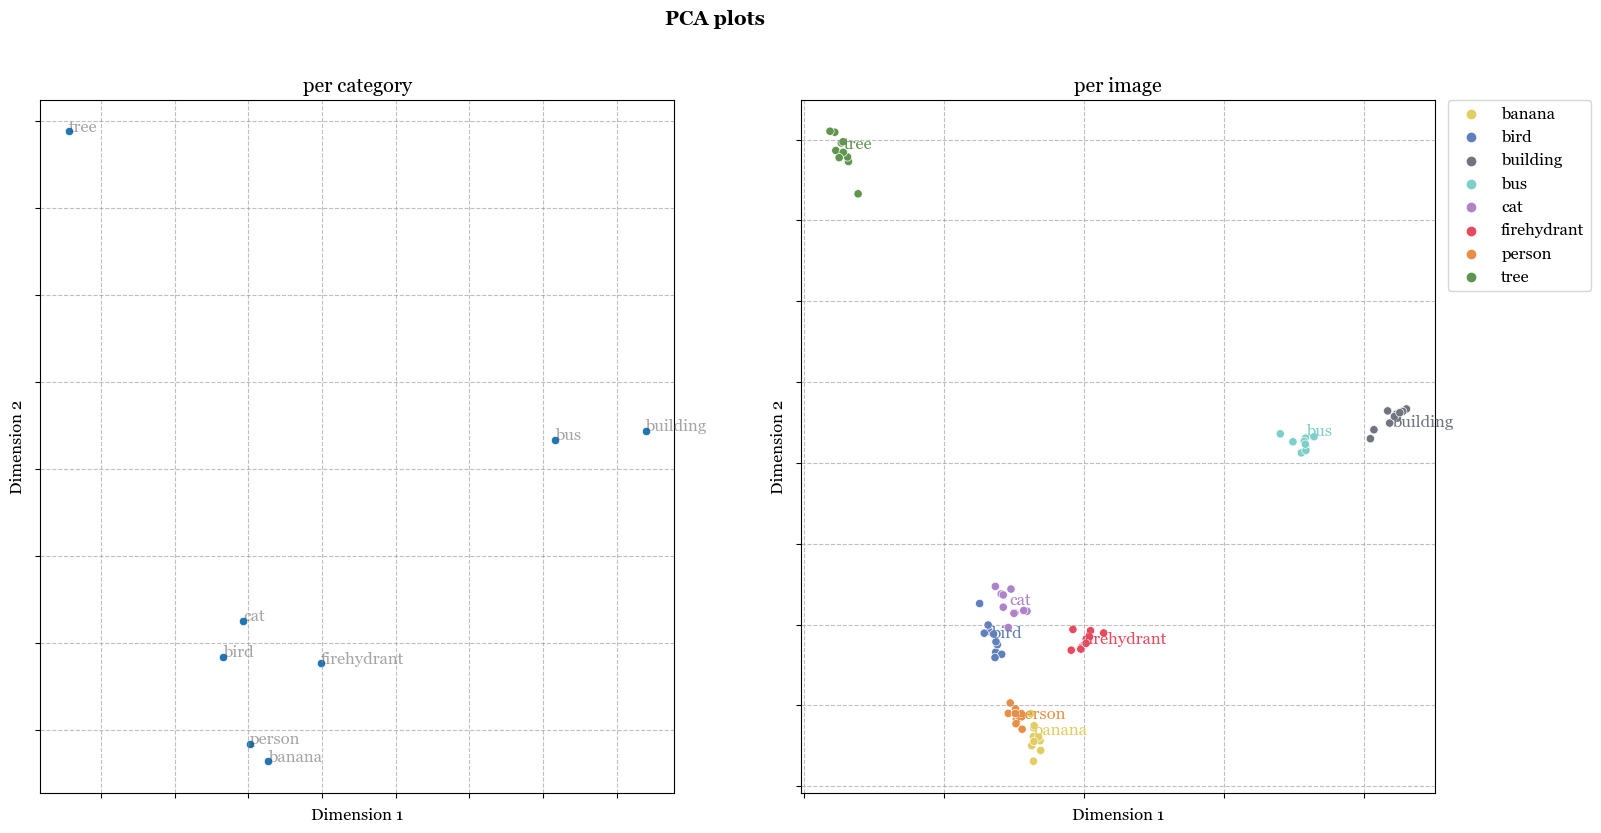

In [24]:
# import packages
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Style
# plt.style.use("./style_sheet/mystyle.mplstyle")

# Load the data
#df = pd.read_csv(r'./fulldataset.csv')


df_soa50['image'] = [df_soa50['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df_soa50)) ]



# extract category labels with set order
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# create a palette for the categories
category_colours = {
    'person': '#E78F46',
    'cat': '#AF83CB',
    'bird': '#6080BD',
    'tree': '#609550',
    'banana': '#E2CD61',
    'firehydrant': '#E74A5F',
    'bus': '#7ECEC9',
    'building': '#6F747F'
}

# extract image labels with set order
im_labels = np.unique(df_soa50['image'])

# Build the normal confusion matrix
y_true = df_soa50['category']
y_pred = df_soa50['choiced_category']
cm = confusion_matrix(y_true, y_pred, labels=labels)
# Standardise it
cm = ( cm - np.mean(cm) ) / np.std(cm)



# Build the image-wise confusion matrix
im_cm = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm[l] = [len(df_soa50.loc[(df_soa50['image']==im) & (df_soa50['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm = (im_cm.sub(np.mean(im_cm.values))).div(np.std(im_cm.values))

# example how to fit and then transform
PCA(n_components=2).fit_transform(cm)
model = PCA(n_components=2).fit(cm)
transformed_data = model.transform(cm)

### Build the dimensionality reduction matrices
# category-wise
std_cm = pd.DataFrame(
    data = {
        'Category': labels,
        'Dimension 1': PCA(n_components=2).fit_transform(cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(cm)[:,1],
    }
)
# image-wise
std_im_cm = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm)[:,1],
    }
)

### Plot the results

fig, axes = plt.subplots(1, 2, figsize = (18, 9))

# category-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1', 
    y = 'Dimension 2', 
    data = std_cm, 
    ax = axes[0],
)
scatterplot.set(xticklabels=[], yticklabels=[])
for j, txt in enumerate(labels):
    axes[0].annotate(txt, (std_cm.loc[j, 'Dimension 1'], std_cm.loc[j, 'Dimension 2']), color=(0.3, 0.3, 0.3, 0.5))
axes[0].set_title('per category')

# image-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = std_im_cm,
    ax = axes[1],
    hue = 'Category',
    palette = category_colours
)
scatterplot.set(xticklabels=[], yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for c in labels:
    axes[1].annotate(
        c,
        (std_cm.loc[std_cm['Category']==c, 'Dimension 1'], std_cm.loc[std_cm['Category']==c, 'Dimension 2']), 
        color = category_colours[c]
    )
axes[1].set_title('per image')

plt.suptitle('PCA plots', fontweight = 'bold')
plt.show()



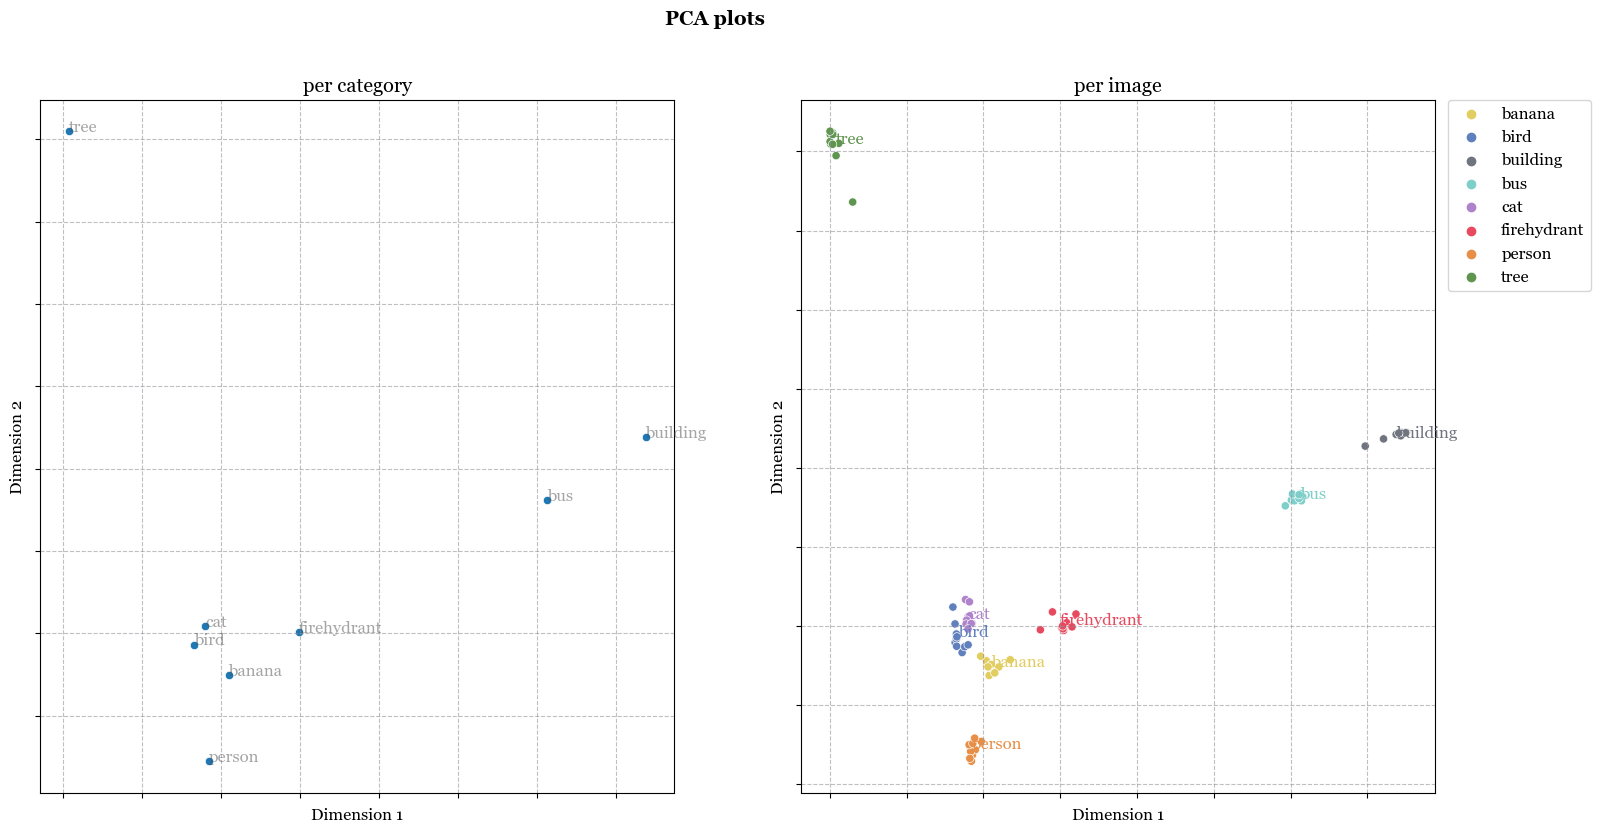

In [25]:
# import packages
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Style
# plt.style.use("./style_sheet/mystyle.mplstyle")

# Load the data
#df = pd.read_csv(r'./fulldataset.csv')


df_soa100['image'] = [df_soa100['filename'].values[i].split('_')[-1].split('.')[-2] for i in range(len(df_soa100)) ]



# extract category labels with set order
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# create a palette for the categories
category_colours = {
    'person': '#E78F46',
    'cat': '#AF83CB',
    'bird': '#6080BD',
    'tree': '#609550',
    'banana': '#E2CD61',
    'firehydrant': '#E74A5F',
    'bus': '#7ECEC9',
    'building': '#6F747F'
}

# extract image labels with set order
im_labels = np.unique(df_soa100['image'])

# Build the normal confusion matrix
y_true = df_soa100['category']
y_pred = df_soa100['choiced_category']
cm = confusion_matrix(y_true, y_pred, labels=labels)
# Standardise it
cm = ( cm - np.mean(cm) ) / np.std(cm)



# Build the image-wise confusion matrix
im_cm = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm[l] = [len(df_soa100.loc[(df_soa100['image']==im) & (df_soa100['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm = (im_cm.sub(np.mean(im_cm.values))).div(np.std(im_cm.values))

# example how to fit and then transform
PCA(n_components=2).fit_transform(cm)
model = PCA(n_components=2).fit(cm)
transformed_data = model.transform(cm)

### Build the dimensionality reduction matrices
# category-wise
std_cm = pd.DataFrame(
    data = {
        'Category': labels,
        'Dimension 1': PCA(n_components=2).fit_transform(cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(cm)[:,1],
    }
)
# image-wise
std_im_cm = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm)[:,1],
    }
)

### Plot the results

fig, axes = plt.subplots(1, 2, figsize = (18, 9))

# category-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1', 
    y = 'Dimension 2', 
    data = std_cm, 
    ax = axes[0],
)
scatterplot.set(xticklabels=[], yticklabels=[])
for j, txt in enumerate(labels):
    axes[0].annotate(txt, (std_cm.loc[j, 'Dimension 1'], std_cm.loc[j, 'Dimension 2']), color=(0.3, 0.3, 0.3, 0.5))
axes[0].set_title('per category')

# image-wise
scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = std_im_cm,
    ax = axes[1],
    hue = 'Category',
    palette = category_colours
)
scatterplot.set(xticklabels=[], yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for c in labels:
    axes[1].annotate(
        c,
        (std_cm.loc[std_cm['Category']==c, 'Dimension 1'], std_cm.loc[std_cm['Category']==c, 'Dimension 2']), 
        color = category_colours[c]
    )
axes[1].set_title('per image')

plt.suptitle('PCA plots', fontweight = 'bold')
plt.show()



## Sensibility

Here we define functions to calculate the sensitivity index (or discrimination index) d' of our data. This index is the difference between the z-scores of the hit rate and false alarm rate of a given set of data. We take it category by category.

In [26]:
def find_hit(data, category):
  """
  Calculates the hit rate for a given category of the eight possible.

  Args:
    data: The DataFrame containing the data.
    category: The given category.

  Returns:
    hit_rate (float): the corresponding hit rate.
  """
  
  hits = np.sum(data.loc[data['category']==category, 'acc'])
  trials = len(data.loc[data['category']==category])

  hit_rate = hits / trials

  return hit_rate

def find_fa(data, category):
  """
  Calculates the false alarm for a given category of the eight possible. Note that this
  rate is corrected for the number of categories.

  Args:
    data: The DataFrame containing the data.
    category: The given category.

  Returns:
    false_alarm_rate (float): the corresponding false alarm rate.
  """
  
  false_alarms = len(data.loc[(data['choiced_category']==category) & (data['category']!=category)])
  n_trials = len(data.loc[(data['category']!=category)])

  false_alarm_rate = false_alarms / n_trials

  return false_alarm_rate

def d_prime(data, category):
  """
  Calculates the discrimination index (d') of a given category given the hit rate,
  false alarm rate, and number of categories.

  Args:
    data (df): dataframe with variables 'category' and 'prediction'
    category (str): name of a category

  Returns:
    d (float): the discrimination index (d') of the input category.
  """
  
  hit_rate = find_hit(data, category)
  false_alarm_rate = find_fa(data, category)

  z_hit = stats.norm.ppf(hit_rate)
  z_fa = stats.norm.ppf(false_alarm_rate)
  
  return z_hit - z_fa

In [27]:
# make a table with the categories and their associated d primes
dprime = pd.DataFrame({
    'category': [category for category in labels],
    'd prime': [d_prime(df, category) for category in labels]
})
# print the results
print(dprime)

      category   d prime
0       person  3.076300
1          cat  2.785230
2         bird  2.679237
3         tree  3.397194
4       banana  3.209836
5  firehydrant  3.312083
6          bus  3.554026
7     building  3.545264


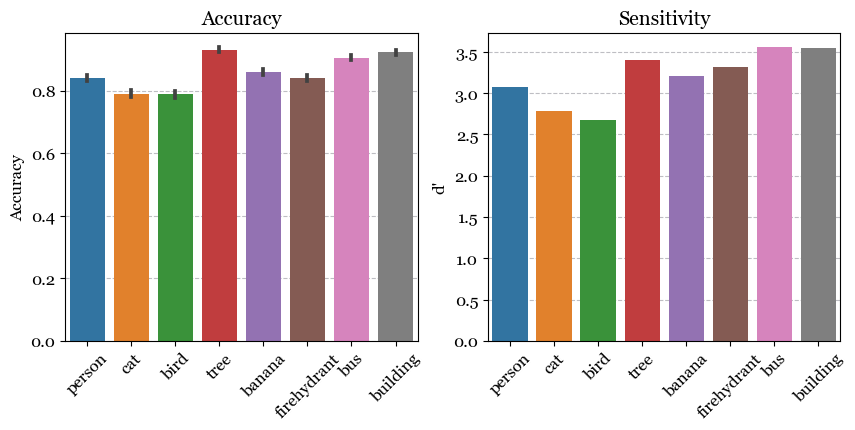

In [28]:
f = plt.figure(figsize = (10,4))
# accuracy plot
f.add_subplot(121)
acc_plot = sns.barplot(data = df, y = 'acc', x = 'category', order = labels, zorder = 2)
plt.xticks(rotation = 45)
acc_plot.set(xlabel = None, ylabel = 'Accuracy', title = 'Accuracy')
# sensitivity plot
f.add_subplot(122)
sen_plot = sns.barplot(data = dprime, y = 'd prime', x = 'category', order = labels, zorder = 2)
sen_plot.set(xlabel = None, ylabel = 'd\'', title = 'Sensitivity')
plt.xticks(rotation = 45)
plt.show()

In [29]:
# SOA 25
im_cm25 = pd.DataFrame(index=[im for im in im_labels])


# create model
# model = PCA(n_components=2).fit(im_cm100)

for l in labels:
    im_cm25[l] = [len(df_soa25.loc[(df_soa25['image']==im) & (df_soa25['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm25 = (im_cm25.sub(np.mean(im_cm25.values))).div(np.std(im_cm25.values))
# build the plot
pca_im_25 = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        # 'Dimension 1': model.transform(im_cm25)[:,0],
        # 'Dimension 2': model.transform(im_cm25)[:,1],
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm25)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm25)[:,1],
    }
)

# SOA 50
im_cm50 = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm50[l] = [len(df_soa50.loc[(df_soa50['image']==im) & (df_soa50['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm50 = (im_cm50.sub(np.mean(im_cm50.values))).div(np.std(im_cm50.values))
# build the plot
pca_im_50 = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        # 'Dimension 1': model.transform(im_cm50)[:,0],
        # 'Dimension 2': model.transform(im_cm50)[:,1],
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm50)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm50)[:,1],
    }
)

# SOA 100
im_cm100 = pd.DataFrame(index=[im for im in im_labels])
for l in labels:
    im_cm100[l] = [len(df_soa100.loc[(df_soa100['image']==im) & (df_soa100['choiced_category']==l)]) for im in im_labels]
# Standardise it
im_cm100 = (im_cm100.sub(np.mean(im_cm100.values))).div(np.std(im_cm100.values))
# build the plot
pca_im_100 = pd.DataFrame(
    data = {
        'Image': im_labels,
        'Category': pd.Series(im_labels).replace({ # adding a category column
            (fr'^{c}\w+'): c for c in labels
            }, regex = True),
        # 'Dimension 1': model.transform(im_cm100)[:,0],
        # 'Dimension 2': model.transform(im_cm100)[:,1],
        'Dimension 1': PCA(n_components=2).fit_transform(im_cm100)[:,0],
        'Dimension 2': PCA(n_components=2).fit_transform(im_cm100)[:,1],
    }
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


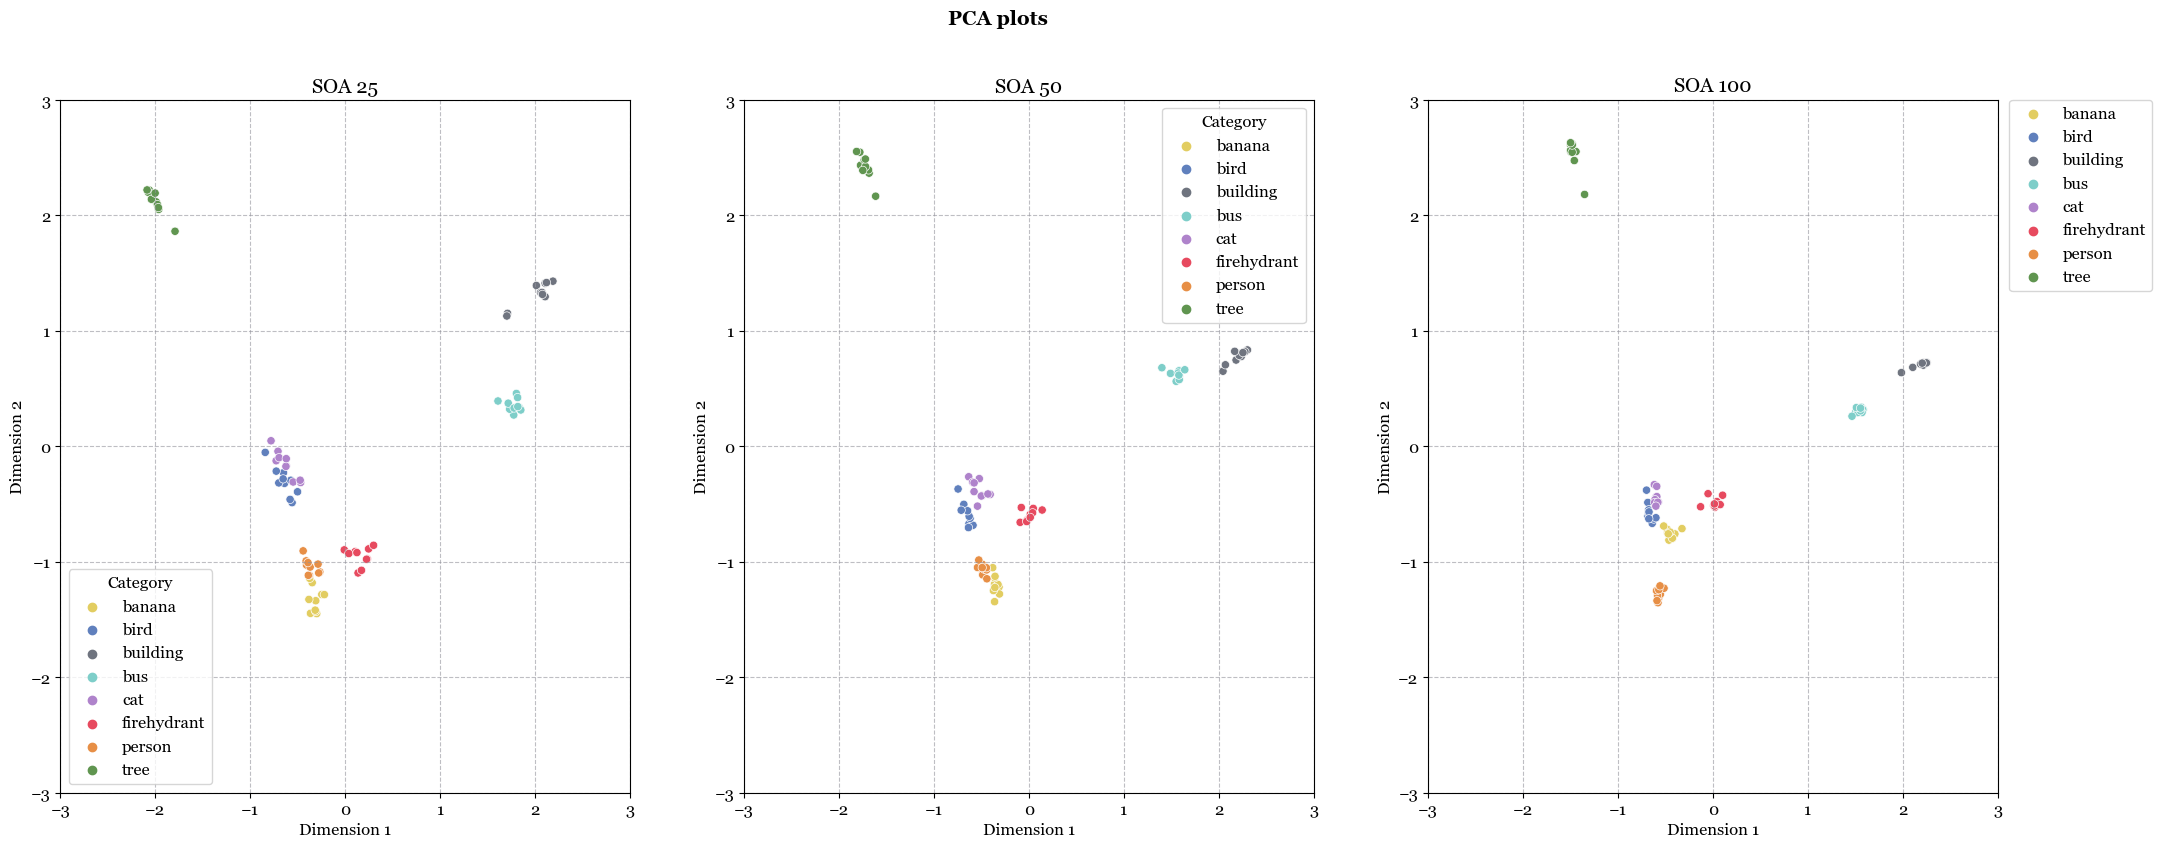

In [30]:

# image-wise
fig, axes = plt.subplots(1, 3, figsize = (25, 9))

scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = pca_im_25,
    ax = axes[0],
    hue = 'Category',
    palette = category_colours
)
# scatterplot.set(xticklabels=[], yticklabels=[])
axes[0].set_ylim(-3, 3)
axes[0].set_xlim(-3, 3)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[0].set_title('SOA 25')

scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = pca_im_50,
    ax = axes[1],
    hue = 'Category',
    palette = category_colours
)
axes[1].set_ylim(-3, 3)
axes[1].set_xlim(-3, 3)
# scatterplot.set(xticklabels=[], yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[1].set_title('SOA 50')

scatterplot = sns.scatterplot(
    x = 'Dimension 1',
    y = 'Dimension 2',
    data = pca_im_100,
    ax = axes[2],
    hue = 'Category',
    palette = category_colours
)
axes[2].set_ylim(-3, 3)
axes[2].set_xlim(-3, 3)
# scatterplot.set(xticklabels=[], yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[2].set_title('SOA 100')

plt.suptitle('PCA plots', fontweight = 'bold')
plt.show()



### RT-Masking Effect Analysis

In [31]:
#Getting the average RT for each condition
#inialize new df taking the only correct responses for to get averages of each condition
rt_mask_df = df_correct
#many small_control average RT
rteff_manysmall_control = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "many small") & (rt_mask_df['difficulty'] == "control") ])
#many small_low average RT
rteff_manysmall_low = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "many small") & (rt_mask_df['difficulty'] == "low") ])
#many small_high average RT
rteff_manysmall_high = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "many small") & (rt_mask_df['difficulty'] == "high") ])
#fewlarge_control average RT
rteff_fewlarge_control = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "few large") & (rt_mask_df['difficulty'] == "control") ])
#fewlarge_low average RT
rteff_fewlarge_low = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "few large") & (rt_mask_df['difficulty'] == "low") ])
#fewlarge_high average RT
rteff_fewlarge_high = statistics.mean(rt_mask_df['rt'][(rt_mask_df['size_occl'] == "few large") & (rt_mask_df['difficulty'] == "high") ])

In [32]:
#Getting the accuracy differences between SOA.025 and SOA.100
acc_mask_df = df
#Initalize the accuracy rates
totalT = acc_mask_df.groupby(['pt_num', 'difficulty', 'size_occl', 'soa', ], as_index=False)['acc'].count()
correctT = acc_mask_df.groupby(['pt_num', 'difficulty', 'size_occl', 'soa'], as_index=False)['acc'].sum()
totalT['acc'] = ((correctT['acc']/totalT['acc'].round(3)))
#Accuracy difference for manysmall control
acceff_manysmall_control = statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.1) ])
#Accuracy difference for manysmall low
acceff_manysmall_low = statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.1) ])
#Accuracy difference for manysmall high
acceff_manysmall_high = statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "many small") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.1) ])
#Accuracy difference for fewlarge control
acceff_fewlarge_control = statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "control") & (totalT['soa'] == 0.1) ])
#Accuracy difference for fewlarge low
acceff_fewlarge_low = statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "low") & (totalT['soa'] == 0.1) ])
#Accuracy difference for fewlarge high
acceff_fewlarge_high = statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.025) ]) - statistics.mean(totalT['acc'][(totalT['size_occl'] == "few large") & (totalT['difficulty'] == "high") & (totalT['soa'] == 0.1) ])

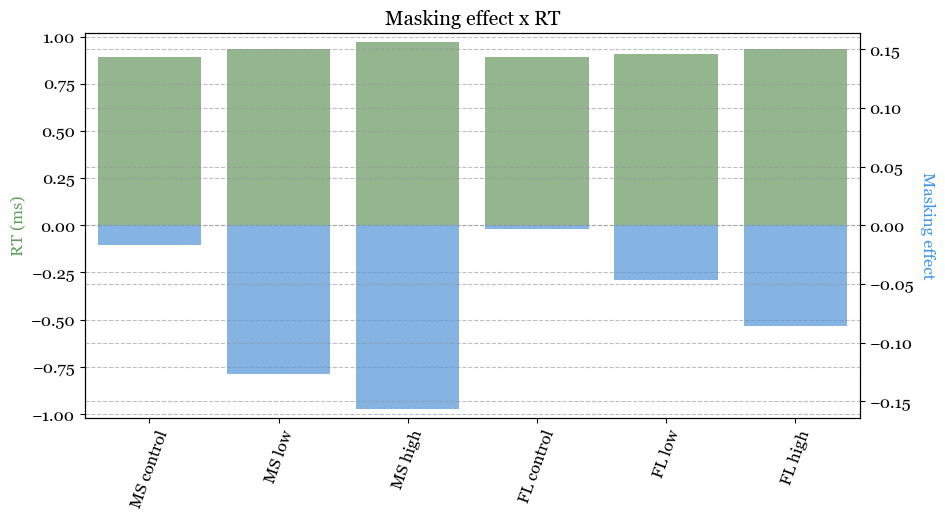

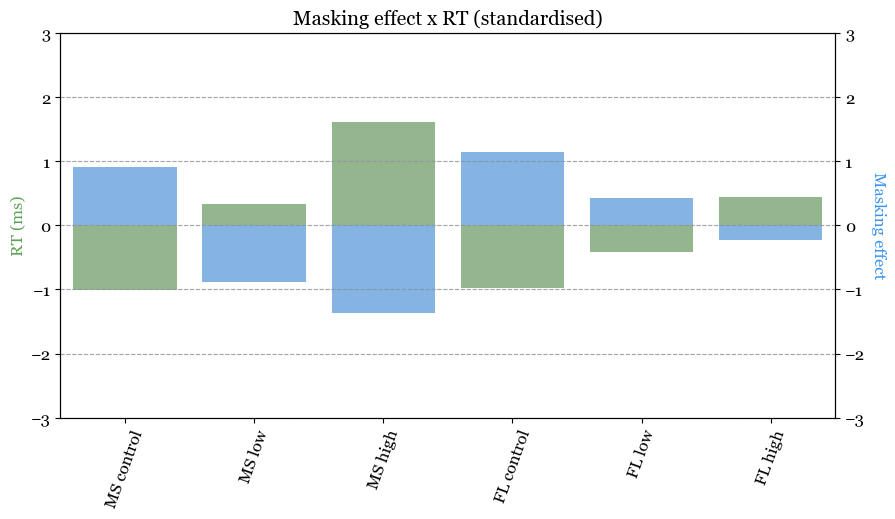

In [33]:
tasks = {
    # here you could (not mandatory) list the tasks and the names
    # to display them with, for instance:
    'manysmall_control': 'MS control',
    'manysmall_low': 'MS low',
    'manysmall_high': 'MS high',
    'fewlarge_control': 'FL control',
    'fewlarge_low': 'FL low',
    'fewlarge_high': 'FL high'
    # this will be used to plot
}

tasks_1 = [
    # here you could (not mandatory) list the tasks and the names
    # to display them with, for instance:
    'MS control',
    'MS low',
    'MS high',
    'FL control',
    'FL low',
    'FL high'
    # this will be used to plot
    ]

# extract the masking effect and RT per task
acc_lst = [acceff_manysmall_control, acceff_manysmall_low, acceff_manysmall_high, acceff_fewlarge_control, acceff_fewlarge_low, acceff_fewlarge_high]
rt_lst = [rteff_manysmall_control, rteff_manysmall_low, rteff_manysmall_high, rteff_fewlarge_control, rteff_fewlarge_low, rteff_fewlarge_high]
# here you make a df with 6 rows, one for each condition, and
# you extract the masking effect and RT for each condition
mask_rt_df =pd.DataFrame(list(zip(tasks_1, acc_lst, rt_lst)),
               columns =['task', 'masking effect', 'RT'])

#mask_rt_df = pd.DataFrame({
#    'task' : ['Many_small_Control', 'Many_small_Low', 'Many_small_High', 'Few_large_Control', 'Few_large_Low', 'Few_large_High']
#    'masking effect': [int(acceff_manysmall_control, acceff_manysmall_low, acceff_manysmall_high, acceff_fewlarge_control, acceff_fewlarge_low, acceff_fewlarge_high]
#    'RT' : [rteff_manysmall_control, rteff_manysmall_low, rteff_manysmall_high, rteff_fewlarge_control, rteff_fewlarge_low, rteff_fewlarge_high]
#})


import pandas as pd

# Assuming tri_1 is your original DataFrame
# Calculate the mean and standard deviation of the columns 'RT' and 'masking effect'
mean_RT = mask_rt_df['RT'].mean()
std_RT = mask_rt_df['RT'].std()
mean_masking_effect = mask_rt_df['masking effect'].mean()
std_masking_effect = mask_rt_df['masking effect'].std()

# Create std_tri_1 with standardized values
mask_rt_df_std = pd.DataFrame()

# Apply the (x-m)/s formula to each column
mask_rt_df_std['RT'] = (mask_rt_df['RT'] - mean_RT) / std_RT
mask_rt_df_std['masking effect'] = (mask_rt_df['masking effect'] - mean_masking_effect) / std_masking_effect

# Copy the 'task' column from tri_1 to std_tri_1
mask_rt_df_std['task'] = mask_rt_df['task']


# correlate the results

corr, p_value = pearsonr(mask_rt_df['RT'].values, mask_rt_df['masking effect'].values)


### Plot the results

# create a function to align the axes of our twin graphs

def align_yaxis(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = (ax1, ax2)
    extrema = [ax.get_ylim() for ax in axes]
    tops = [extr[1] / (extr[1] - extr[0]) for extr in extrema]
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [list(reversed(l)) for l in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    b_new_t = extrema[0][0] + tot_span * (extrema[0][1] - extrema[0][0])
    t_new_b = extrema[1][1] - tot_span * (extrema[1][1] - extrema[1][0])
    axes[0].set_ylim(extrema[0][0], b_new_t)
    axes[1].set_ylim(t_new_b, extrema[1][1])

# plot the resulting vectors without standardisation, then with it

# make a twin bar plot
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(111)
plt.xticks(rotation=70)
ax2 = ax1.twinx()

# RT plot
rt_plot = sns.barplot(
    y = 'RT', 
    x = 'task', 
    data=mask_rt_df,
        color='#5ea157', 
    alpha = 0.7, 
    ax = ax1
)
rt_plot.set(title= 'Masking effect x RT', ylabel='RT (ms)', xlabel=None)
rt_plot.set_xticklabels(tasks.values())
ax1.yaxis.label.set_color('#5ea157') #setting up Y-axis label color to green

# masking effect plot
m_plot = sns.barplot(
    y = 'masking effect', 
    x = 'task', 
    data=mask_rt_df, 
    alpha = 0.7, 
    color='#3b94ed',
    ax=ax2
)
m_plot.set(xlabel = None)
ax2.set_ylabel('Masking effect', rotation = 270, labelpad = 15)
m_plot.set_xticklabels(tasks.values()) # remove x tick labels here
ax2.yaxis.label.set_color('#3b94ed')

align_yaxis(ax1, ax2)
#plt.savefig(r'./corr_RT_mask/barplot_rt_mask.png')
plt.show()



# Making the graph again
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(111)
plt.xticks(rotation=70)
ax2 = ax1.twinx()

# RT plot
rt_plot = sns.barplot(
    y = 'RT', 
    x = 'task', 
    data=mask_rt_df_std, 
    color='#5ea157', 
    alpha = 0.7, 
    ax = ax1
)
rt_plot.set(title= 'Masking effect x RT (standardised)', ylabel='RT (ms)', xlabel=None)
ax1.yaxis.label.set_color('#5ea157')
ax1.set_ylim(-3, 3)

# masking effect plot
m_plot = sns.barplot(
    y = 'masking effect', 
    x = 'task', 
    data=mask_rt_df_std, 
    alpha = 0.7, 
    color='#3b94ed',
    ax=ax2
)
m_plot.set(xlabel = None)
m_plot.set_xticklabels([])
ax2.set_ylabel('Masking effect', rotation = 270, labelpad = 15)
ax2.set_xticklabels(tasks.values())
ax2.yaxis.label.set_color('#3b94ed')
ax2.set_ylim(-3, 3)

# align the axes
align_yaxis(ax1, ax2)
#plt.savefig(r'./corr_RT_mask/std_barplot_rt_mask.png')
plt.show()